<a href="https://colab.research.google.com/github/zeroam/jupyter-notebook/blob/master/dive_into_deep_learning/3.14.numerical_stability_and_init.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mxnet==1.6.0b20190915
!pip install d2l

In [0]:
%matplotlib inline
import mxnet as mx
from mxnet import nd, autograd
from matplotlib import pyplot as plt

M = nd.random.normal(shape=(4, 4))
print('A single matrix', M)
for i in range(100):
  M = nd.dot(M, nd.random.normal(shape=(4, 4)))

print('After multiplying 100 matrices', M)

A single matrix 
[[ 0.57461417  1.4661262   0.6862904   0.35496104]
 [ 1.0731696   0.12017461 -0.9711102  -0.77569664]
 [-0.7882176   0.7417728  -1.4734439  -1.0730928 ]
 [-1.0424827  -1.3278849  -1.4749662  -0.52414197]]
<NDArray 4x4 @cpu(0)>
After multiplying 100 matrices 
[[-4.9732617e+19  1.0571412e+19 -1.1375701e+19  3.6837393e+19]
 [ 1.9690676e+21 -4.1856494e+20  4.5039019e+20 -1.4584796e+21]
 [ 1.1309429e+21 -2.4040616e+20  2.5868245e+20 -8.3768044e+20]
 [ 5.6130530e+20 -1.1931684e+20  1.2838883e+20 -4.1575610e+20]]
<NDArray 4x4 @cpu(0)>


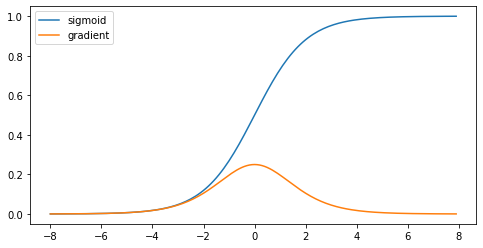

In [0]:
x = nd.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
  y = x.sigmoid()
y.backward()

plt.figure(figsize=(8, 4))
plt.plot(x.asnumpy(), y.asnumpy())
plt.plot(x.asnumpy(), x.grad.asnumpy())
plt.legend(['sigmoid', 'gradient'])
plt.show()